# Steam Game Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('bestSelling_games.csv')

In [4]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [6]:
df.isnull().sum()

game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['release_date']=pd.to_datetime(df['release_date'])

Since the data was clear enough to be processed, let's get to the analysis. 

In [9]:
df.describe()

,reviews_like_rate,all_reviews_number,release_date,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,2020-11-22 23:42:27.226890752,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
min,20.000000,1.000000e+01,1994-08-03 00:00:00,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2018-08-07 18:00:00,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,2022-07-04 00:00:00,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,2024-07-17 06:00:00,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,2025-05-30 00:00:00,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08
std,12.643745,2.137197e+05,NaN,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07


## Explanatory Data Analysis

### What's the correlation between these variables? (reviews_like_rate, all_reviews_number, price, age_restriction, rating, difficulty, length, estimated_downloads)

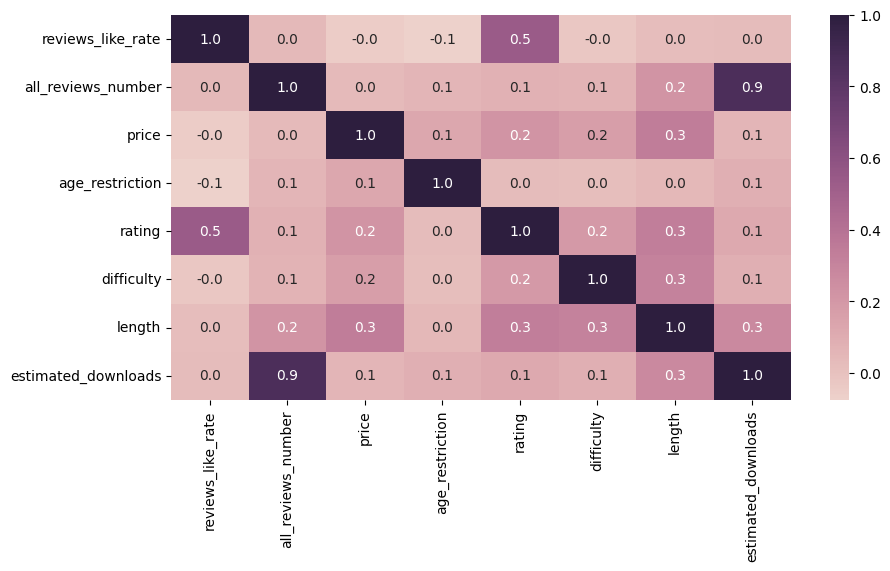

In [10]:
num_data = ['reviews_like_rate', 'all_reviews_number', 'price', 'age_restriction', 'rating', 'difficulty', 'length', 'estimated_downloads']
df_num = df[num_data]
corr_matrix = df_num.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

From the visualization above, we can see these variables:
- all reviews number with estimated downloads = 0.9
- rating with reviews_like_rate = 0.5
- price with length = 0.3
- rating with length = 0.3
- length with estimated downloads = 0.3
- length with difficulty = 0.3


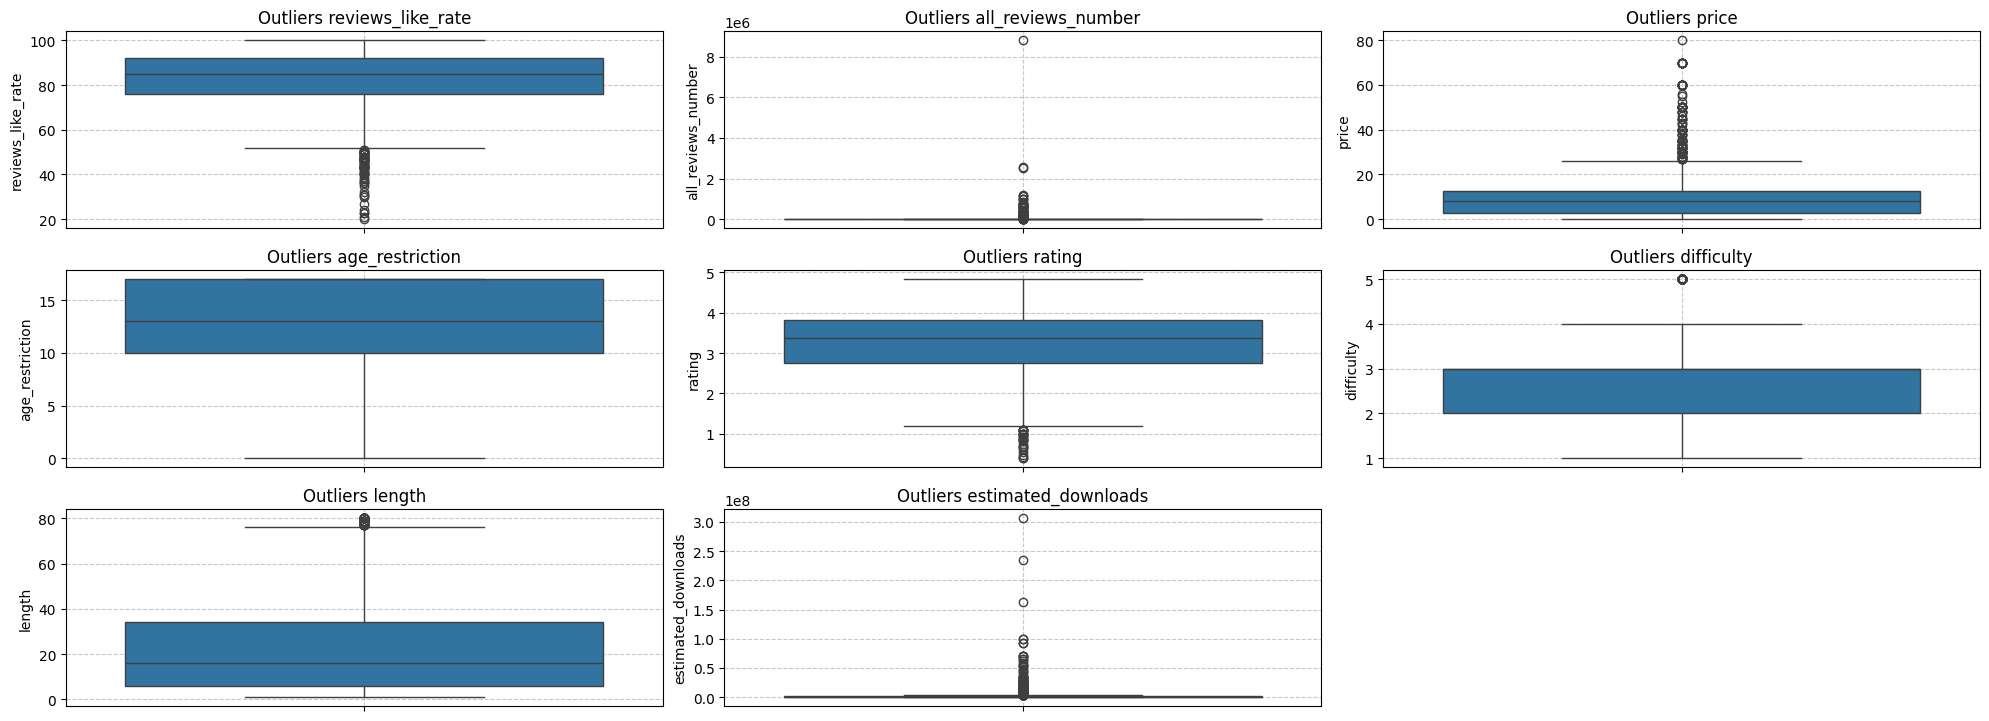

In [11]:
num_list = df_num.columns.to_list()
num_plots = len(num_list)
num_cols = 3
num_rows = (num_plots+num_cols-1)

plt.figure(figsize=(num_rows*2, num_cols*8))
for i, col in enumerate(num_list):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df_num[col])
    plt.title(f'Outliers {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Upon closer inspection, I found that the variables 'price,' 'estimated downloads,' and 'reviews' indeed contain the most outliers. However, after cross-referencing these outliers with the specific game names, it appears that these higher prices are actually legitimate for those particular games, which are known to be expensive titles. So, i'll not take any action to do with the outliers to do with top 10 game reviews, downloads and prices. 

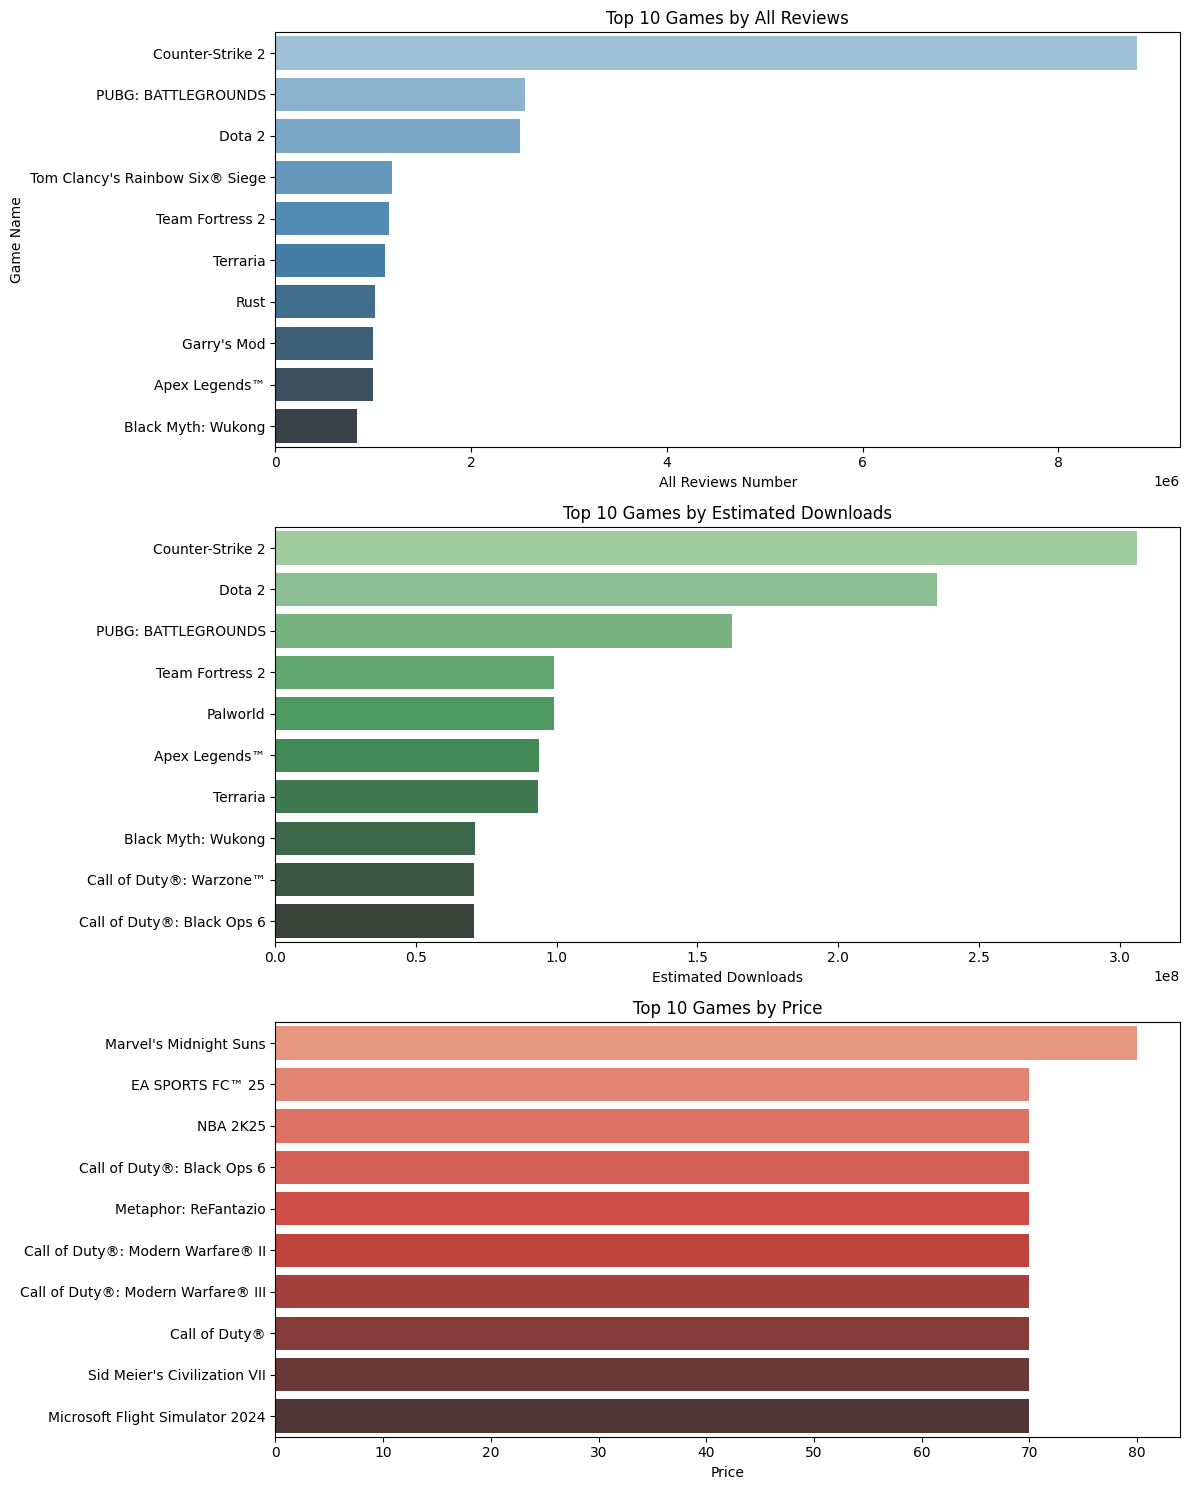

In [12]:
top_reviews = df.nlargest(10, 'all_reviews_number')[['game_name', 'all_reviews_number']]
top_downloads = df.nlargest(10, 'estimated_downloads')[['game_name', 'estimated_downloads']]
top_price = df.nlargest(10, 'price')[['game_name', 'price']]

fig, axes = plt.subplots(3, 1, figsize=(12,15))

# Plot top reviews
sns.barplot(data=top_reviews, x='all_reviews_number', y='game_name', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Games by All Reviews')
axes[0].set_xlabel('All Reviews Number')
axes[0].set_ylabel('Game Name')

# Plot top downloads
sns.barplot(data=top_downloads, x='estimated_downloads', y='game_name', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Games by Estimated Downloads')
axes[1].set_xlabel('Estimated Downloads')
axes[1].set_ylabel('')

# Plot top price
sns.barplot(data=top_price, x='price', y='game_name', ax=axes[2], palette='Reds_d')
axes[2].set_title('Top 10 Games by Price')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

Now i can understand why the outliers were so high. As a gamers, we all know that the outliers causes have the most popularity in gamers circle, it's giving "no gamers doesn't download this game" XD. But, to reach our goals, we can do any action with these outliers.

### What's the most downloaded game (top 10, based on rating) and what's the genre is (user_defined_tags)?

In [13]:
rating_threshold = 3.0

games_with_good_rating = df[df['rating'] >= rating_threshold].copy()
top_10_downloaded_high_rated_games = games_with_good_rating.nlargest(10, 'estimated_downloads')
plot_data = top_10_downloaded_high_rated_games[[
    'game_name', 'estimated_downloads', 'rating', 'user_defined_tags'
]].copy()

plot_data['user_defined_tags_display'] = plot_data['user_defined_tags'].apply(
    lambda x: ', '.join(x.split(', ')[:3]) + ('...' if len(x.split(', ')) > 3 else '')
)

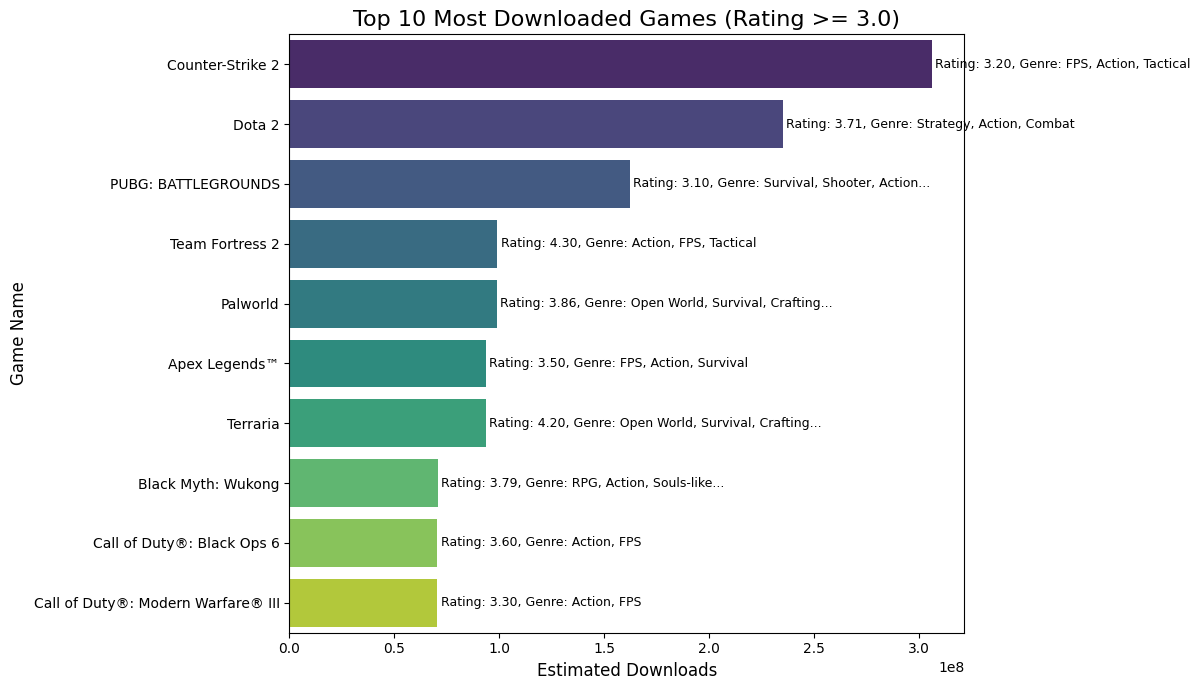

In [14]:
plt.figure(figsize=(12, 7))

plot_data_sorted = plot_data.sort_values(by='estimated_downloads', ascending=False)

sns.barplot(
    x='estimated_downloads',
    y='game_name',
    data=plot_data_sorted,
    palette='viridis'
)

plt.title(f'Top 10 Most Downloaded Games (Rating >= {rating_threshold})', fontsize=16)
plt.xlabel('Estimated Downloads', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, row in enumerate(plot_data_sorted.itertuples()):
    plt.text(
        getattr(row, 'estimated_downloads') + (plot_data_sorted['estimated_downloads'].max() * 0.005),
        index,
        f"Rating: {getattr(row, 'rating'):.2f}, Genre: {getattr(row, 'user_defined_tags_display')}",
        color='black', va='center', fontsize=9
    )

plt.tight_layout()
plt.show()

look interesting, i wanna know what's the most popular and what's the most unpopular genre that gamers prefer with

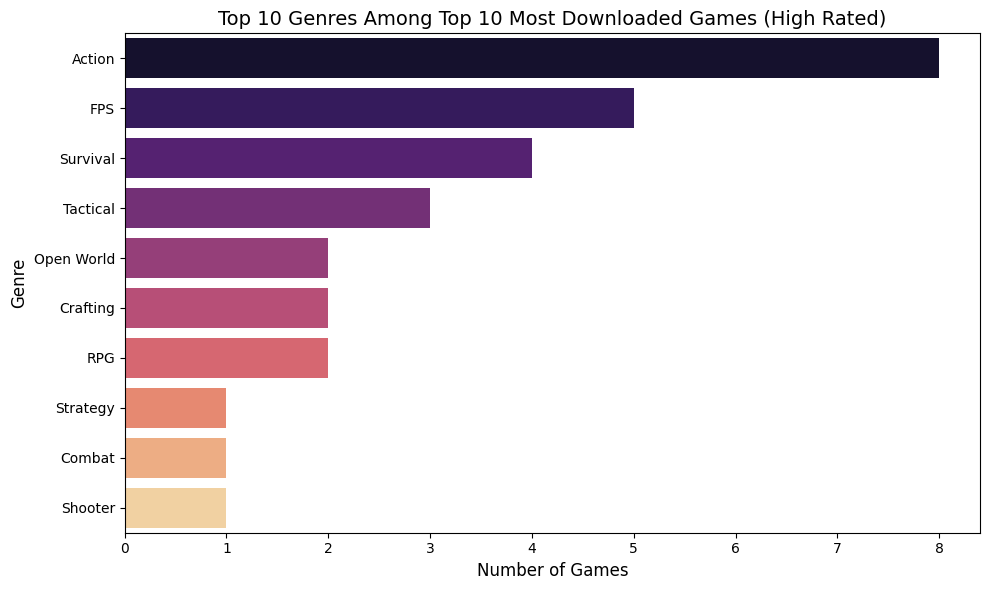

In [15]:
all_genres = []
for tags_string in top_10_downloaded_high_rated_games['user_defined_tags']:
    all_genres.extend([tag.strip() for tag in tags_string.split(',')])

genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Top 10 Genres Among Top 10 Most Downloaded Games (High Rated)', fontsize=14)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

The visualizations clearly reveal a strong correlation between gamer genre preference and highly downloaded titles. The "Top 10 Genres Among Top 10 Most Downloaded Games (High Rated)" definitively shows that Action is the most prevalent genre among top-rated, highly downloaded games, closely followed by related genres like FPS, Survival, and Tactical. This observation is remarkably consistent with the "Top 10 Most Downloaded Games (Rating >= 3.0)" chart. Prominent titles such as Counter-Strike 2, Dota 2, PUBG: BATTLEGROUNDS, Team Fortress 2, and Apex Legends, which dominate the top download ranks, all feature "Action" or "FPS" as core genres. Even games like Call of Duty: Black Ops 6 and Call of Duty: Modern Warfare III explicitly fall under the Action, FPS genre, further reinforcing this market preference.

In conclusion, the high frequency of Action and its sub-genres (FPS, Tactical, Survival, Combat, Shooter) among the most downloaded and well-rated games strongly suggests that gamers widely prefer fast-paced, action-packed, and competitive gaming experiences. This directly translates to the dominance of action-oriented games in the top download charts. For game developers aiming to achieve broad market reach and high download numbers, focusing on the action genre and its sub-genres appears to be a highly promising strategy, provided that game quality (rating) is also maintained.

let's get to the most unpopular games.

In [16]:
games_with_bad_rating = df[df['rating'] <= rating_threshold].copy()
top_10_lowest_games = games_with_bad_rating.nsmallest(10, 'estimated_downloads')
plot_data_lowest = top_10_lowest_games[[
    'game_name', 'estimated_downloads', 'rating', 'user_defined_tags'
]].copy()

plot_data_lowest['user_defined_tags_display_lowest'] = plot_data_lowest['user_defined_tags'].apply(
    lambda x: ','.join(x.split(',')[:3]) + ('...' if len(x.split(','))<3 else '' )
)

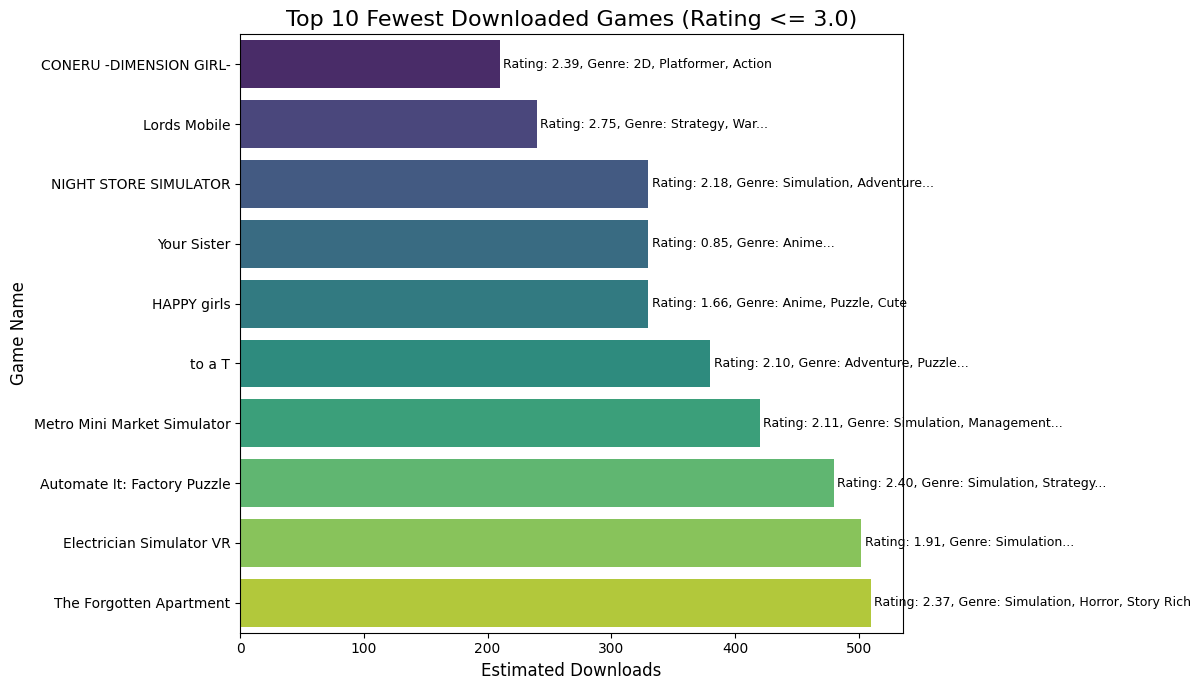

In [17]:
plt.figure(figsize=(12, 7))

plot_data_sorted_low = plot_data_lowest.sort_values(by='estimated_downloads', ascending=True)

sns.barplot(
    x='estimated_downloads',
    y='game_name',
    data=plot_data_sorted_low,
    palette='viridis'
)

plt.title(f'Top 10 Fewest Downloaded Games (Rating <= {rating_threshold})', fontsize=16)
plt.xlabel('Estimated Downloads', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, row in enumerate(plot_data_sorted_low.itertuples()):
    plt.text(
        getattr(row, 'estimated_downloads') + (plot_data_sorted_low['estimated_downloads'].max() * 0.005),
        index,
        f"Rating: {getattr(row, 'rating'):.2f}, Genre: {getattr(row, 'user_defined_tags_display_lowest')}",
        color='black', va='center', fontsize=9
    )    

plt.tight_layout()
plt.show()

Well, i think even the game has genre action, it's not always that will having a high rating nor estimated downloads. It's all depends on user preferences i guess, also, the quality of the game, the gameplay, the story, the graphics, the sound, the music, the replay value, etc. But, is that accurate? let's see it later :p

## Is the difficulty of each games impact for the game's performance (rating, downloads)?

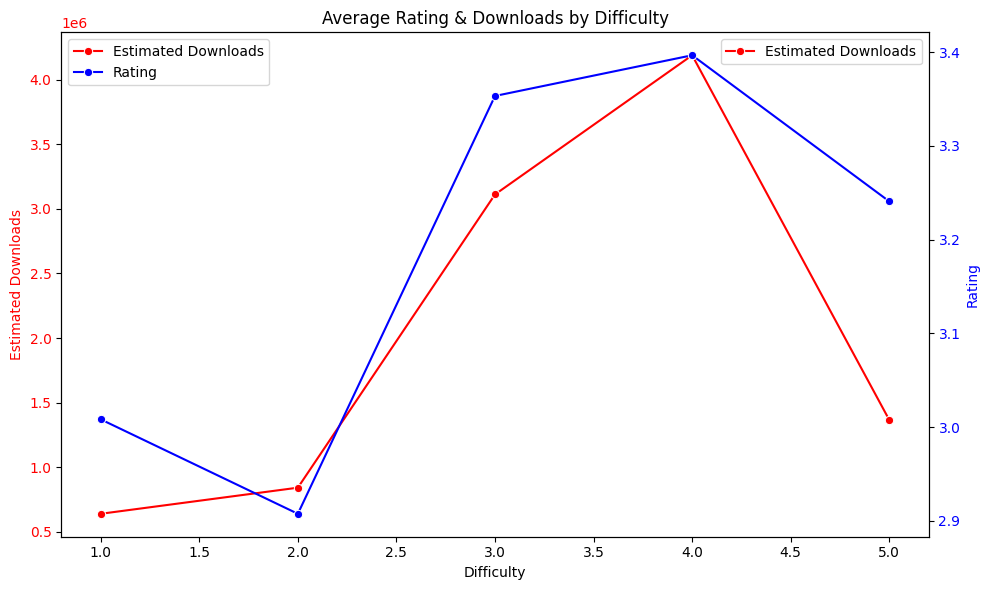

In [18]:
df_grouped = df.groupby('difficulty').agg({
    'rating': 'mean',
    'estimated_downloads': 'mean'
}).reset_index()


fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x='difficulty', y='estimated_downloads', data=df_grouped,
             marker='o', label='Estimated Downloads', color='red', ax=ax1)
ax1.set_xlabel('Difficulty')
ax1.set_ylabel('Estimated Downloads', color='red')
ax1.tick_params(axis='y', labelcolor='red') 
ax2 = ax1.twinx()

sns.lineplot(x='difficulty', y='rating', data=df_grouped,
             marker='o', label='Rating', color='blue', ax=ax2)
ax2.set_ylabel('Rating', color='blue')
ax2.tick_params(axis='y', labelcolor='blue') 
plt.title('Average Rating & Downloads by Difficulty')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout() 
plt.show()

Okay, let's break down what this cool graph is telling us about game difficulty and its impact.

Looking at this "Average Rating & Downloads by Difficulty" chart, it's pretty clear that **difficulty plays a really interesting role** in how games perform. We've got two lines here: the red one for "Estimated Downloads" and the blue one for "Rating."

First off, both downloads and ratings seem to **follow a similar wavy path** as difficulty goes up. They both start off okay at difficulty level 1.0, but then they actually take a little dip when things get to about 2.0. This might suggest that games that are *too easy* (or just a little bit harder than "super easy") aren't quite hitting the sweet spot.

But here's where it gets exciting: both downloads and ratings **really jump up around difficulty level 3.0 and peak at 4.0!** So, it looks like gamers really dig a challenge, and they're more likely to download and enjoy games that are on the tougher side. It's like Goldilocks finding the "just right" challenge.

However, once games get *too* hard (at difficulty 5.0), we see **both downloads and ratings start to drop off again.** This makes sense – a game that's overly frustrating might scare off players, even if they initially like a challenge.

In short, it seems like **there's a sweet spot for difficulty, right around level 4.0**, where games tend to get the most downloads and the highest ratings. It's a balancing act: challenging enough to be engaging, but not so hard that it becomes a turn-off.

## What's the most OS used to download games (user_os) and what's the most popular game in this OS?

In [22]:
all_supported_os = []
for os_string in df['supported_os']:
    if pd.isna(os_string):
        continue

    for os_name in os_string.split(','):
        cleaned_os = os_name.strip() 
        if cleaned_os and cleaned_os.lower() != 'music': 
            all_supported_os.append(cleaned_os)

In [23]:
os_counts = pd.Series(all_supported_os).value_counts()

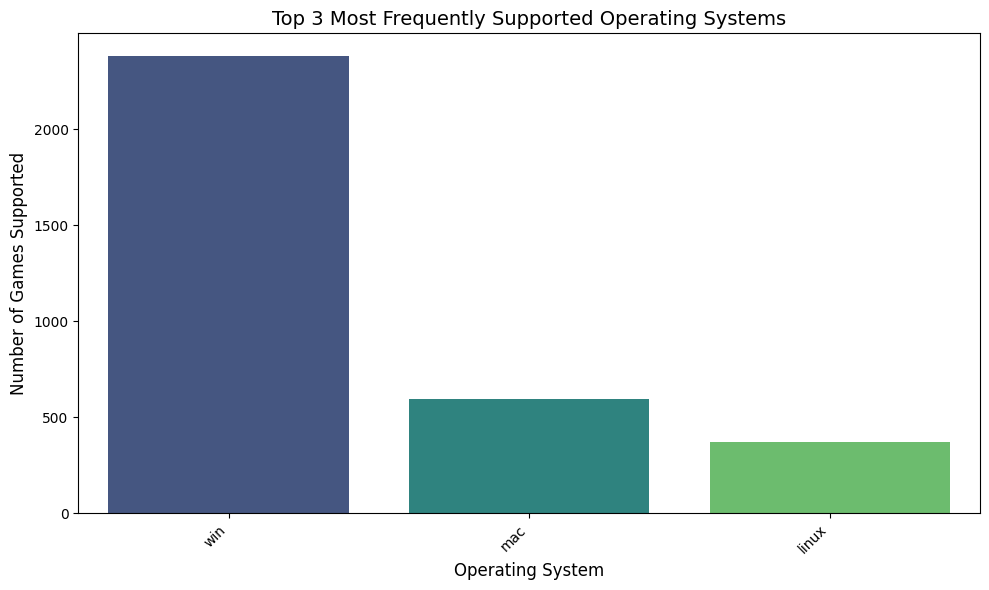

In [26]:
if not os_counts.empty:
    most_used_os = os_counts.index[0]
    most_used_os_count = os_counts.iloc[0]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=os_counts.head(5).index, y=os_counts.head(5).values, palette='viridis') 
    plt.title('Top 3 Most Frequently Supported Operating Systems', fontsize=14)
    plt.xlabel('Operating System', fontsize=12)
    plt.ylabel('Number of Games Supported', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No valid OS data found after cleaning.")
    most_used_os = None 


In [ ]:
if most_used_os: 
    games_in_most_used_os = df[
        df['supported_os'].notna() &
        df['supported_os'].str.contains(most_used_os, case=False, na=False)
    ].copy()

    if not games_in_most_used_os.empty:
        most_popular_game_in_os = games_in_most_used_os.nlargest(1, 'estimated_downloads')

        print(f"--- Most Popular Game in '{most_used_os}' ---")
        game_name = most_popular_game_in_os['game_name'].iloc[0]
        downloads = most_popular_game_in_os['estimated_downloads'].iloc[0]
        rating = most_popular_game_in_os['rating'].iloc[0]
        genre = most_popular_game_in_os['user_defined_tags'].iloc[0]
        
        print(f"Game Name: {game_name}")
        print(f"Estimated Downloads in {most_used_os}: {downloads:,}")
        print(f"Rating: {rating:.2f}")
        print(f"Genre: {genre}")

    else:
        print(f"No games found supporting '{most_used_os}' with download data after filtering.")
else:
    print("Cannot determine the most popular game as no valid OS was found.")


--- Most Popular Game in 'win' ---
Game Name: Counter-Strike 2
Estimated Downloads in win: 306,170,000
Rating: 3.20
Genre: FPS, Action, Tactical


Alright, let's put these pieces together!

So, looking at the "Top 3 Most Frequently Supported Operating Systems" chart, it's super clear that Windows ('win') is the undisputed king when it comes to games. Developers are definitely focusing their efforts there, with a massive number of games available on Windows compared to macOS and Linux, which are quite a bit behind. This basically tells us that if you're a PC gamer, Windows is where all the action is.

And it gets even more interesting when we look at the "Most Popular Game in 'win'" data. It's Counter-Strike 2, with an absolutely staggering 306 million estimated downloads! This huge number really drives home just how dominant Windows is as a gaming platform. It makes perfect sense that the most frequently supported OS would also host the most incredibly popular games. Plus, with its "FPS, Action, Tactical" genres, Counter-Strike 2 perfectly aligns with our earlier finding that action-packed and competitive games are what a lot of gamers are looking for. So, the popularity of Windows as a gaming OS and the popularity of games on it go hand-in-hand.

## How's the price of the games impact for the game's performance?

In [29]:
df_plot_price_impact = df.copy()

In [30]:
df_plot_price_impact['log_price'] = np.log1p(df_plot_price_impact['price'])
df_plot_price_impact['log_estimated_downloads'] = np.log1p(df_plot_price_impact['estimated_downloads'])


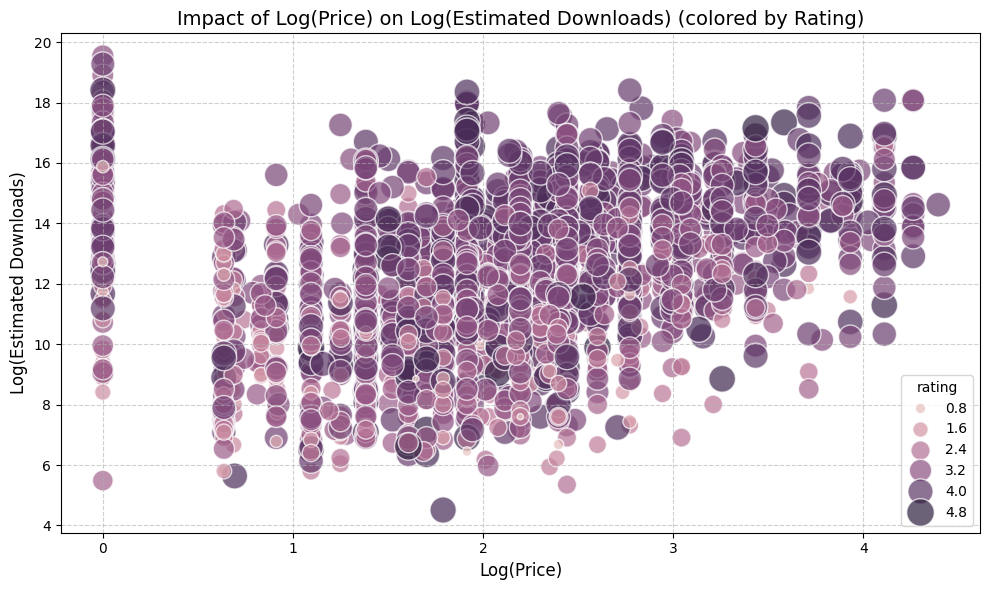

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot_price_impact,
    x='log_price',
    y='log_estimated_downloads',
    hue='rating', # Use rating as hue to see if high-rated games behave differently
    size='rating', # Use rating as size for more visual impact
    sizes=(20, 400), # Adjust size range
    alpha=0.7 # Add transparency
)
plt.title("Impact of Log(Price) on Log(Estimated Downloads) (colored by Rating)", fontsize=14)
plt.xlabel("Log(Price)", fontsize=12)
plt.ylabel("Log(Estimated Downloads)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Analyzing the two provided graphs, "Impact of Log(Price) on Log(Estimated Downloads) (colored by Rating)" and "Impact of Log(Price) on Rating (colored by Estimated Downloads)," reveals distinct patterns regarding how game price influences its performance. From the first graph, it's evident that game price significantly impacts download volume. A dense cluster of points is observed at the left side of the Log(Price) axis (representing free or very low-priced games), which also consistently reach the highest Log(Estimated Downloads) values. This strong concentration highlights that games with little to no cost possess a far greater potential for massive user acquisition compared to their paid counterparts. Generally, an inverse relationship is observed; as Log(Price) increases, the potential for achieving extremely high download numbers tends to diminish. However, it's worth noting that highly-rated games (indicated by darker, larger points) are distributed across various price points, suggesting that while price affects volume, game quality remains a crucial factor for significant downloads, even for paid titles.

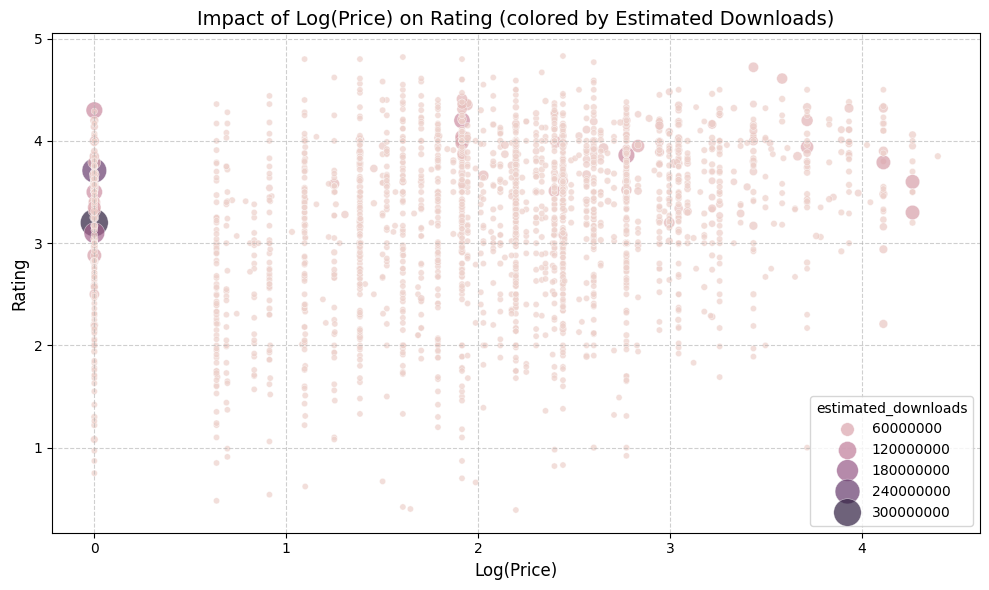

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot_price_impact,
    x='log_price',
    y='rating',
    hue='estimated_downloads', # Use downloads as hue to see if highly downloaded games behave differently
    size='estimated_downloads', # Use downloads as size for more visual impact
    sizes=(20, 400), # Adjust size range
    alpha=0.7 # Add transparency
)
plt.title("Impact of Log(Price) on Rating (colored by Estimated Downloads)", fontsize=14)
plt.xlabel("Log(Price)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conversely, the second graph, "Impact of Log(Price) on Rating (colored by Estimated Downloads)," shows that there is no strong linear correlation between a game's price and its rating. Ratings appear broadly distributed across the entire Log(Price) spectrum. Games with the highest ratings (closer to 5.0 on the Y-axis) are found at both ends of the price spectrum—from completely free to moderately expensive titles. The dense cluster of low-priced games still exhibits a wide range of ratings, from very low to exceptionally high, indicating that affordability does not inherently guarantee good or bad reviews; rather, it's the intrinsic quality and player experience that ultimately drives the rating.

In essence, while price profoundly dictates a game's potential for widespread adoption and massive download numbers, its direct influence on a game's qualitative reception (rating) is less pronounced. Game quality, regardless of its cost, remains the primary determinant of player satisfaction and critical acclaim. Developers aiming for maximum reach should consider lower price points, whereas those focusing on perceived value and player satisfaction must prioritize delivering a high-quality experience, as players are willing to pay for exceptional content.